### Linear Regression Model :

Linear regression is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a straight line to the data. 
### Applications in Agriculture:
1. **Crop Yield Prediction**: Predict crop yield based on environmental variables like temperature, rainfall, and soil quality.
2. **Water Management**: Optimize irrigation by analyzing rainfall's impact on crop yield.
3. **Fertilizer & Pesticide Optimization**: Determine optimal fertilizer/pesticide levels to maximize yield while minimizing waste.
4. **Climate Change Impact**: Assess how climate variations affect crop growth and adapt farming practices.
5. **Soil Quality Analysis**: Study how soil properties influence crop yield and guide soil management.
6. **Pricing & Market Forecasting**: Forecast crop prices based on historical data and environmental factors.
7. **Disease & Pest Control**: Predict pest or disease outbreaks based on environmental conditions.
8. **Precision Agriculture**: Use data to optimize farming practices such as planting density and pest control.

Linear regression enables better decision-making, resource management and increased farming productivity.

# Linear Regression Model:Crop Yield Prediction

   Temperature    Rainfall  Crop_Yield
0    24.805588  125.613827  -14.991062
1    23.342213   94.067594   -8.837257
2    23.829131   89.905468    0.218009
3    28.400124   89.026592    0.271584
4    23.957967  129.283207  -33.970496
5    30.375036  103.263571  -22.323807
6    27.933359   95.708694   21.851656
7    27.378788   94.409329   -4.076868
8    28.591305   96.923770    7.015093
9    25.307619  100.568414    2.975271

Summary Statistics:
        Temperature      Rainfall    Crop_Yield
count  10000.000000  10000.000000  10000.000000
mean      25.004687    100.176874     -5.114818
std        4.909975     20.033605     14.083624
min        4.639378     26.214423    -54.914428
25%       21.766156     86.561642    -14.630331
50%       24.944754    100.248225     -5.176399
75%       28.301191    113.711786      4.591114
max       42.913322    170.429388     49.185032

Shape of the dataset:
(10000, 3)

Mean Squared Error: 105.51


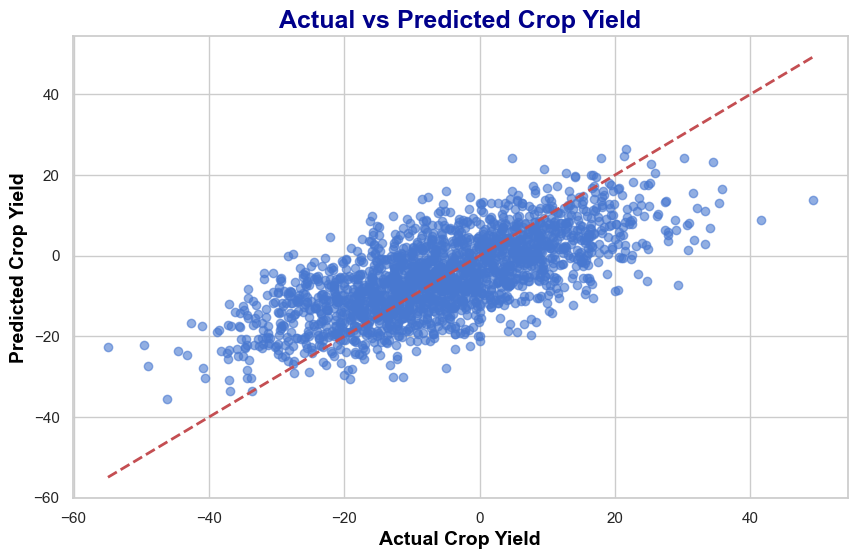

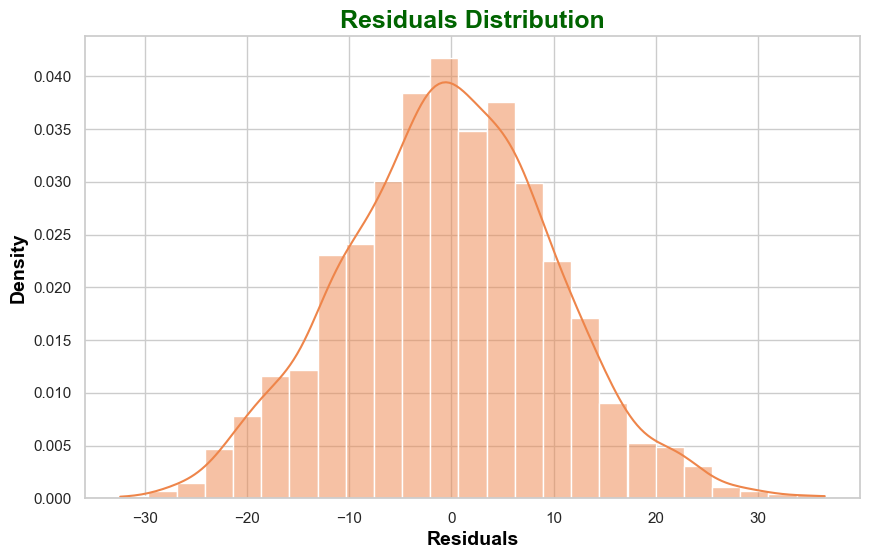

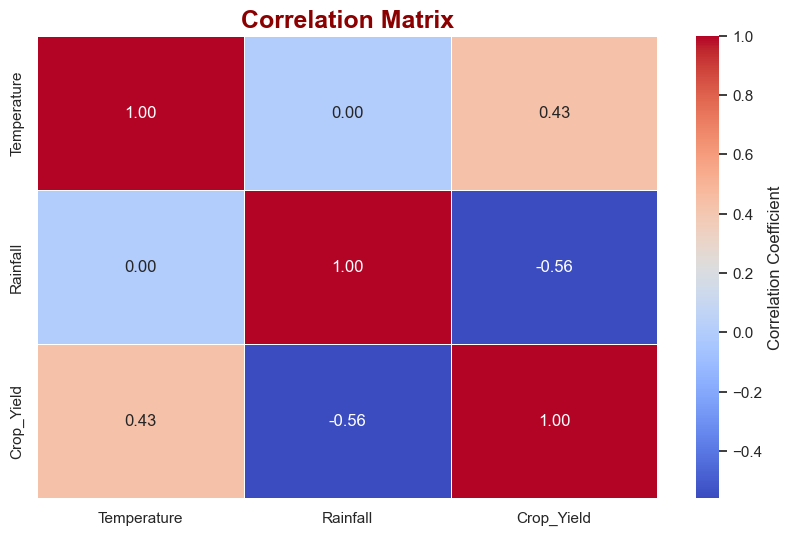

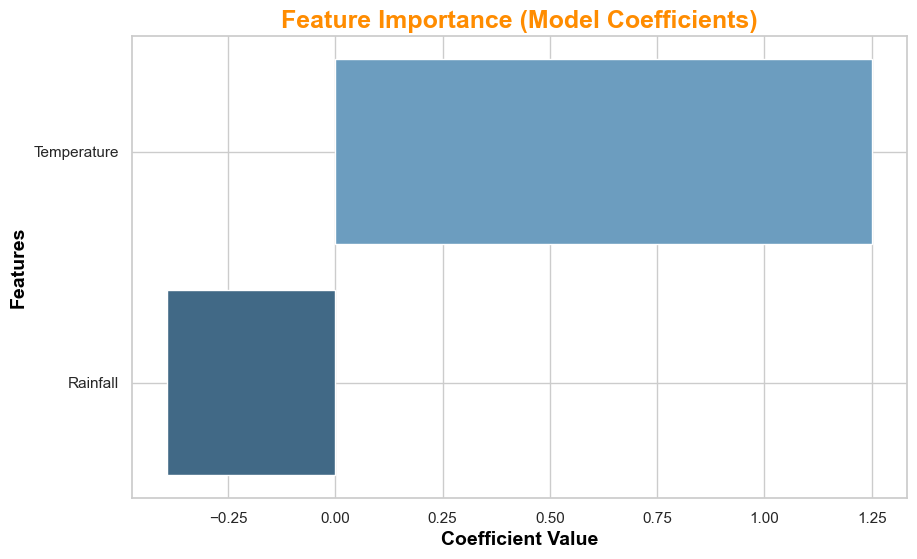

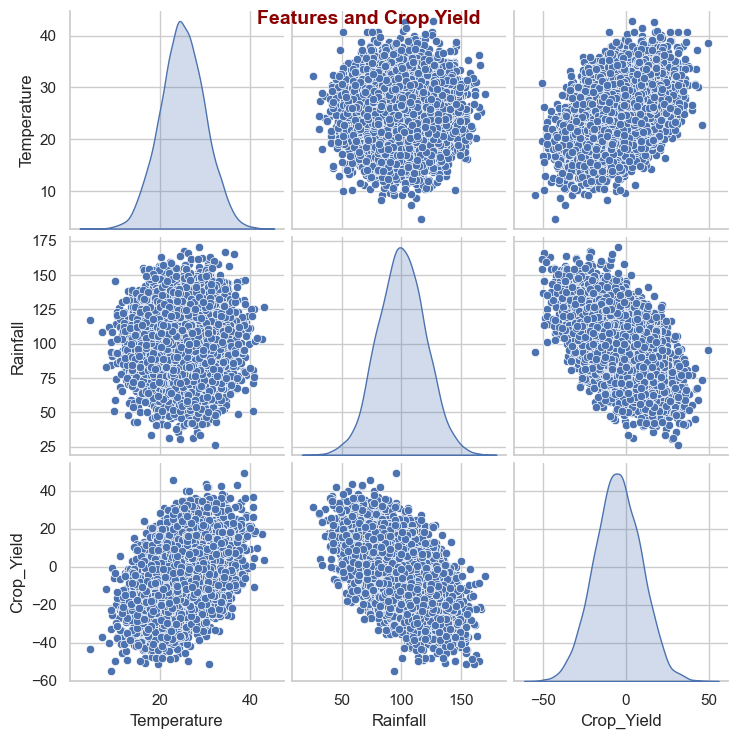


    ### Model Interpretation:

    1. Mean Squared Error (MSE): 105.51
       - The model has an average deviation of approximately 10.27 units from the actual Crop_Yield.
       
    2. Model Coefficients:
       - Temperature Coefficient: 1.25, meaning a 1 unit increase in Temperature results in a 1.25 unit change in Crop_Yield.
   - Rainfall Coefficient: -0.39, meaning a 1 unit increase in Rainfall results in a -0.39 unit change in Crop_Yield.

3. Data Summary:
   - Temperature has a mean of 25.00 with a standard deviation of 4.91.
   - Rainfall has a mean of 100.18 with a standard deviation of 20.03.

    4. Key Insights:
    
    5. Model Evaluation:
    - The model appears reasonably fitted as the residuals (difference between predicted and actual Crop_Yield) show no clear patterns.
    - The Mean Squared Error (MSE) value reflects the average deviation of predictions from actual Crop_Yield.

    6. Limitations:
    - The model was trained on synthetic data, and may not account 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Function to generate synthetic data or use provided data
def generate_synthetic_data(n_samples=10000):
    """
    Function to generate synthetic crop yield data influenced by temperature and rainfall.
    """
    # Generate dummy data
    temperature = np.random.normal(25, 5, n_samples)  # Average temp: 25°C, stddev: 5
    rainfall = np.random.normal(100, 20, n_samples)   # Average rainfall: 100mm, stddev: 20
    crop_yield = 5 + 1.2 * temperature - 0.4 * rainfall + np.random.normal(0, 10, n_samples)
    
    # Create a DataFrame
    data = pd.DataFrame({
        'Temperature': temperature,
        'Rainfall': rainfall,
        'Crop_Yield': crop_yield
    })
    
    return data

# Function to fit the model, evaluate, and generate interpretation
def analyze_data(data, target_column, features_columns):
    """
    Function to train a linear regression model and provide detailed analysis of the data and model results.
    """
    print(data.head(10))
    print("\nSummary Statistics:")
    print(data.describe())
    print("\nShape of the dataset:")
    print(data.shape)
    
    # Split the data into training and test sets
    X = data[features_columns]
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate the Mean Squared Error (MSE) to evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    print(f'\nMean Squared Error: {mse:.2f}')

    # Dynamic model coefficients
    coefficients = model.coef_

    # Summary of the data
    summary_stats = {col: {'mean': data[col].mean(), 'std': data[col].std()} for col in features_columns}

    # Prepare interpretation dynamically based on model results
    interpretation = f"""
    ### Model Interpretation:

    1. Mean Squared Error (MSE): {mse:.2f}
       - The model has an average deviation of approximately {np.sqrt(mse):.2f} units from the actual {target_column}.
       
    2. Model Coefficients:
    """
    
    for i, feature in enumerate(features_columns):
        interpretation += f"   - {feature} Coefficient: {coefficients[i]:.2f}, meaning a 1 unit increase in {feature} results in a {coefficients[i]:.2f} unit change in {target_column}.\n"
    
    interpretation += "\n3. Data Summary:\n"
    
    for col, stats in summary_stats.items():
        interpretation += f"   - {col} has a mean of {stats['mean']:.2f} with a standard deviation of {stats['std']:.2f}.\n"

    interpretation += f"""
    4. Key Insights:
    """
    sns.set(style="whitegrid")
    palette = sns.color_palette("muted", 7)

    # 1. Actual vs Predicted Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, color=palette[0], alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.title('Actual vs Predicted Crop Yield', fontsize=18, fontweight='bold', color='darkblue')
    plt.xlabel('Actual Crop Yield', fontsize=14, fontweight='bold', color='black')
    plt.ylabel('Predicted Crop Yield', fontsize=14, fontweight='bold', color='black')
    plt.grid(True)
    plt.show()

    # 2. Residuals Plot (difference between actual and predicted values)
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color=palette[1], bins=25, stat="density")
    plt.title('Residuals Distribution', fontsize=18, fontweight='bold', color='darkgreen')
    plt.xlabel('Residuals', fontsize=14, fontweight='bold', color='black')
    plt.ylabel('Density', fontsize=14, fontweight='bold', color='black')
    plt.grid(True)
    plt.show()

    # 3. Correlation Matrix Heatmap
    correlation = data.corr()
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 12}, cbar_kws={'label': 'Correlation Coefficient'})
    plt.title('Correlation Matrix', fontsize=18, fontweight='bold', color='darkred')
    plt.show()

    # 4. Feature Importance (model coefficients plot)
    plt.figure(figsize=(10, 6))
    feature_importance = pd.DataFrame({
        'Feature': features_columns,
        'Coefficient': coefficients
    }).sort_values(by='Coefficient', ascending=False)

    sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='Blues_d')
    plt.title('Feature Importance (Model Coefficients)', fontsize=18, fontweight='bold', color='darkorange')
    plt.xlabel('Coefficient Value', fontsize=14, fontweight='bold', color='black')
    plt.ylabel('Features', fontsize=14, fontweight='bold', color='black')
    plt.grid(True)
    plt.show()

    # 5. Pairplot to show relationships between features and target variable
    sns.pairplot(data[['Temperature', 'Rainfall', 'Crop_Yield']], kind='scatter', diag_kind='kde')
    plt.suptitle('Features and Crop Yield', fontsize=14, fontweight='bold', color='darkred')
    plt.show()

    interpretation += f"""
    5. Model Evaluation:
    - The model appears reasonably fitted as the residuals (difference between predicted and actual {target_column}) show no clear patterns.
    - The Mean Squared Error (MSE) value reflects the average deviation of predictions from actual {target_column}.

    6. Limitations:
    - The model was trained on synthetic data, and may not account for other real-world variables influencing {target_column} (e.g., soil quality, pests).
    - Future improvements could include adding more factors and using more advanced models to improve prediction accuracy.

    Conclusion:
    The linear regression model provides a simple but effective approach to predicting {target_column} based on the features. However, further refinements are recommended for greater accuracy and real-world applicability.
    """

    print(interpretation)

data = generate_synthetic_data()

target_column = 'Crop_Yield'
features_columns = ['Temperature', 'Rainfall']

analyze_data(data, target_column, features_columns)
